## Import Packages & Load Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('transaction.csv')
dataset.head()

,InvoiceNo,StockCode,Qty,InvoiceDate,CustomerID,Country
0,537626,22725,830,12/7/2010 14:57,12347,Iceland
1,537626,22729,948,12/7/2010 14:57,12347,Iceland
2,537626,22195,695,12/7/2010 14:57,12347,Iceland
3,542237,22725,636,1/26/2011 14:30,12347,Iceland
4,542237,22729,536,1/26/2011 14:30,12347,Iceland


## Data Exploration

In [3]:
country = dataset['Country'].value_counts()
country

Country
Germany                 2269
France                  2109
EIRE                    1620
Netherlands              634
Spain                    539
Belgium                  486
Switzerland              434
Portugal                 367
Australia                356
Norway                   239
Italy                    190
Channel Islands          184
Finland                  152
Cyprus                   113
Sweden                   109
Denmark                   98
Japan                     92
Austria                   88
Poland                    80
Israel                    61
USA                       47
Singapore                 45
Unspecified               44
Canada                    36
Iceland                   35
Greece                    33
United Arab Emirates      23
Malta                     15
RSA                       14
Brazil                     8
Lithuania                  8
Lebanon                    5
European Community         5
Czech Republic             4
Bahrai

In [4]:
transaksi = dataset.groupby(['Country', 'InvoiceNo'])['Qty'].sum()
transaksi = transaksi.groupby('Country').mean()
transaksi = pd.DataFrame({'Country': transaksi.index, 'Avg Qty per Transaction': transaksi.values})
print(transaksi)

                 Country  Avg Qty per Transaction
0              Australia              4026.295455
1                Austria              3420.250000
2                Bahrain              1470.000000
3                Belgium              3032.714286
4                 Brazil              4389.000000
5                 Canada              6449.666667
6        Channel Islands              4569.714286
7                 Cyprus              3550.875000
8         Czech Republic              1239.500000
9                Denmark              3018.888889
10                  EIRE              3788.866071
11    European Community               921.666667
12               Finland              3118.000000
13                France              3197.549419
14               Germany              3119.766578
15                Greece              3473.000000
16               Iceland              3267.666667
17                Israel              7046.500000
18                 Italy              3186.096774


## Clusterization

In [5]:
cluster_i = []
cluster_val = []
centroids = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = 3, random_state = i * 42)
    transaksi['Cluster'] = kmeans.fit_predict(transaksi[['Avg Qty per Transaction']])
    cluster_i.append(i)
    cluster_val.append(kmeans.inertia_)
    centroids.append(kmeans.cluster_centers_)

for i in range(10):
    print(f"Iteration {cluster_i[i]}, SSE: {cluster_val[i]}")

Iteration 1, SSE: 13229107.198522322
Iteration 2, SSE: 13229107.198522322
Iteration 3, SSE: 13229107.198522322
Iteration 4, SSE: 16420994.70816292
Iteration 5, SSE: 16420994.70816292
Iteration 6, SSE: 16420994.70816292
Iteration 7, SSE: 13229107.198522322
Iteration 8, SSE: 13229107.198522322
Iteration 9, SSE: 16420994.70816292
Iteration 10, SSE: 13229107.198522322


In [6]:
min_sse = np.argmin(cluster_val)
cluster = cluster_i[min_sse]
print(f"Cluster with the smallest SSE is found in iteration {cluster}")

Cluster with the smallest SSE is found in iteration 1


In [7]:
centroid = centroids[cluster].flatten()

for i, val in enumerate(centroid):
    print(f"Cluster {i + 1}: {val}")

Cluster 1: 3542.2195214569438
Cluster 2: 6173.85081300813
Cluster 3: 1400.1303418803418


In [8]:
sorted_ = np.argsort(centroid)

for i in sorted_:
    print(f"Cluster {i + 1}: {centroid[i]}")

Cluster 3: 1400.1303418803418
Cluster 1: 3542.2195214569438
Cluster 2: 6173.85081300813


In [9]:
low_clust_index = sorted_[1]
medium_clust_index = sorted_[-1]
high_clust_index = sorted_[0]

low_clust = transaksi[transaksi['Cluster'] == low_clust_index]['Country'].tolist()
medium_clust = transaksi[transaksi['Cluster'] == medium_clust_index]['Country'].tolist()
high_clust = transaksi[transaksi['Cluster'] == high_clust_index]['Country'].tolist()

print(f'Countries with low transactions:\n{low_clust}\n')
print(f'Countries with medium transactions:\n{medium_clust}\n')
print(f'Countries with high transactions:\n{high_clust}')

Countries with low transactions:
['Bahrain', 'Czech Republic', 'European Community', 'Lithuania', 'Saudi Arabia', 'Sweden']

Countries with medium transactions:
['Australia', 'Austria', 'Belgium', 'Brazil', 'Channel Islands', 'Cyprus', 'Denmark', 'EIRE', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Italy', 'Japan', 'Lebanon', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Spain', 'Unspecified']

Countries with high transactions:
['Canada', 'Israel', 'RSA', 'Singapore', 'Switzerland', 'USA', 'United Arab Emirates']


## Visualization

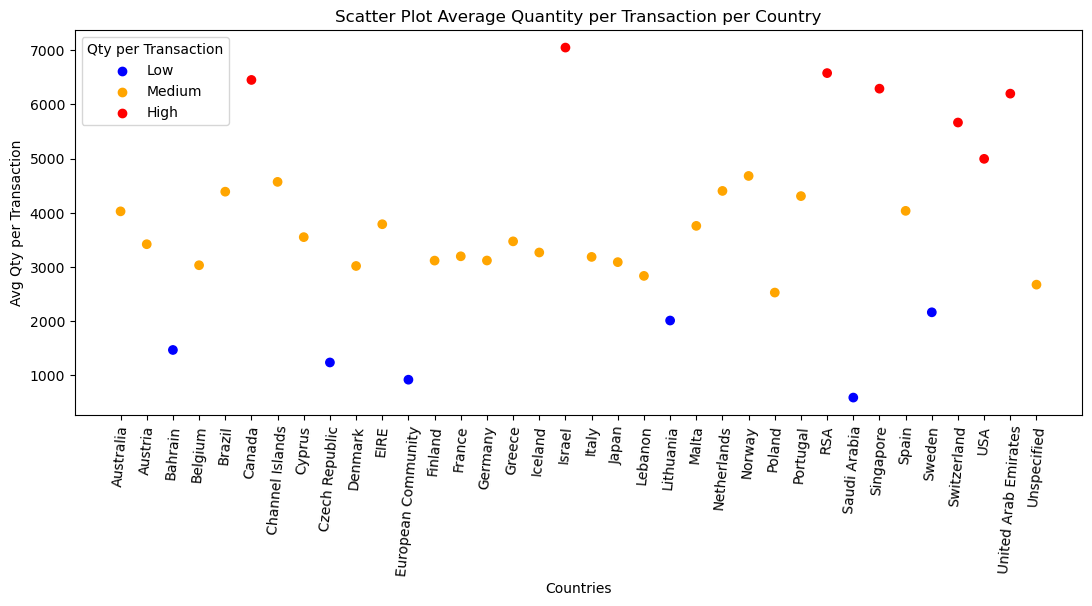

In [10]:
colors = transaksi['Cluster'].map({low_clust_index: 'blue',
                                   medium_clust_index: 'orange',
                                   high_clust_index: 'red'})

plt.figure(figsize = (13, 5))
plt.scatter(transaksi['Country'], transaksi['Avg Qty per Transaction'], c = colors)
plt.xlabel('Countries')
plt.ylabel('Avg Qty per Transaction')
plt.title('Scatter Plot Average Quantity per Transaction per Country')
plt.scatter([], [], color = 'blue', label = 'Low')
plt.scatter([], [], color = 'orange', label = 'Medium')
plt.scatter([], [], color = 'red', label = 'High')
plt.legend(title = 'Qty per Transaction', loc = 'upper left')
plt.xticks(rotation = 85)
plt.show()